In [1]:
library(hexView)

In [2]:
data<-readEViews('EXPEND.WF1')

Warning message in readEViews("EXPEND.WF1"):
“Skipping boilerplate variable
”
Warning message in readEViews("EXPEND.WF1"):
“Skipping boilerplate variable
”


In [3]:
cosm<-ts(data['COSM'], frequency = 1, start=1990)
dpi<-ts(data['DPI'], frequency = 1, start=1990)
pr<-ts(data['PRELCOSM'], frequency = 1, start=1990)

In [4]:
mod2<-lm(diff(cosm)~0+diff(dpi)+diff(pr))
summary(mod2)


Call:
lm(formula = diff(cosm) ~ 0 + diff(dpi) + diff(pr))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.227865 -0.043511  0.009764  0.080838  0.183366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
diff(dpi)  0.0053152  0.0008413   6.318 2.34e-06 ***
diff(pr)  -0.1005870  0.0123231  -8.163 4.22e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1075 on 22 degrees of freedom
Multiple R-squared:  0.8932,	Adjusted R-squared:  0.8835 
F-statistic: 92.01 on 2 and 22 DF,  p-value: 2.06e-11


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“plot type 'line' will be truncated to first character”


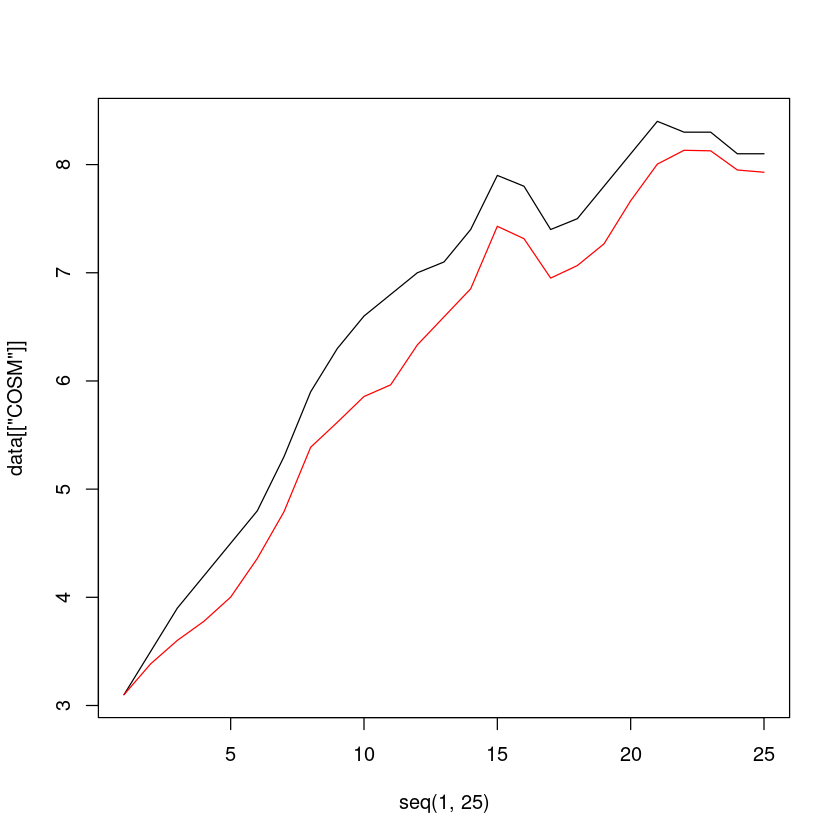

In [5]:
# data[['COSM']]
plot(seq(1,25),data[['COSM']], type='l')
lines(cosm[1]+diffinv(mod2$fitted), type='line', col='red')

In [6]:
mod1 <- lm(cosm~dpi+pr)
res <- mod1$residuals

In [7]:
library(dynlm)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [8]:
mod3<-dynlm(diff(cosm)~L(res)[2:25]+diff(dpi)+diff(pr))
summary(mod3)


Time series regression with "ts" data:
Start = 1991, End = 2014

Call:
dynlm(formula = diff(cosm) ~ L(res)[2:25] + diff(dpi) + diff(pr))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.200946 -0.035923 -0.000138  0.056072  0.163577 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.063756   0.046475   1.372   0.1853    
L(res)[2:25]  0.384385   0.167941   2.289   0.0331 *  
diff(dpi)     0.002773   0.001738   1.596   0.1262    
diff(pr)     -0.108227   0.011810  -9.164 1.35e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09917 on 20 degrees of freedom
Multiple R-squared:  0.853,	Adjusted R-squared:  0.831 
F-statistic: 38.69 on 3 and 20 DF,  p-value: 1.621e-08


In [9]:
mod3$fitted.values

A Time Series:
 [1]  0.26657359  0.23642343  0.22087055  0.29892626  0.35481360  0.44926553
 [7]  0.59059430  0.27311366  0.30135042  0.22690863  0.40094611  0.22223644
[13]  0.22791424  0.45335359 -0.09504802 -0.37037405  0.12253859  0.25313471
[19]  0.39721014  0.35799544  0.09251346 -0.07531084 -0.17532233 -0.03062697

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“plot type 'line' will be truncated to first character”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“plot type 'line' will be truncated to first character”


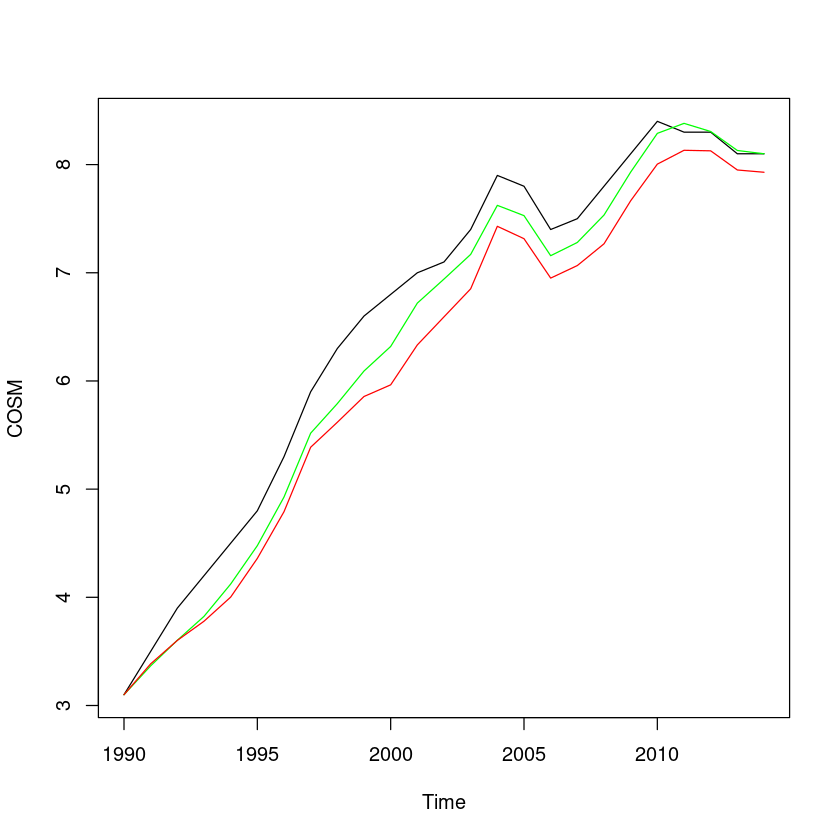

In [10]:
plot(cosm)
lines(cosm[1]+diffinv(mod3$fitted.values), type='line', col='green')
lines(ts(cosm[1]+diffinv(mod2$fitted), start=1990), type='line', col='red')

In [11]:
library(lmtest)

In [12]:
#H_0: X does not Granger Casue Y
grangertest(data[['PRELDOC']], data[['DOC']], order = 2)

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,18,NA,NA,NA
2,20,-2,3.005629,0.07476845


In [13]:
grangertest(data[['DOC']], data[['PRELDOC']], order = 2)

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,18,NA,NA,NA
2,20,-2,15.17637,0.0001372974


In [14]:
df1 <- data[,c('COSM', 'DPI', 'PRELCOSM')]

In [15]:
library(vars)

Loading required package: MASS

Loading required package: strucchange

Loading required package: sandwich

Loading required package: urca



In [16]:
VARselect(df1, lag.max = 5, type="const")

,1,2,3,4,5
AIC(n),1.768025,1.183906,1.374042,-0.1478196,-1.5075782
HQ(n),1.884652,1.388002,1.665608,0.2312163,-1.0410724
SC(n),2.365465,2.229425,2.867641,1.7938583,0.8821793
FPE(n),5.956127,3.584318,5.311525,1.8293717,1.3285599


In [17]:
dim(df1)

[1] 25  3

In [18]:
summary(VAR(df1, p = 5))


VAR Estimation Results:
Endogenous variables: COSM, DPI, PRELCOSM 
Deterministic variables: const 
Sample size: 20 
Log Likelihood: -22.061 
Roots of the characteristic polynomial:
 1.12 0.9613 0.9613 0.958 0.958 0.9497 0.9497 0.9032 0.9032 0.8906 0.8906 0.8424 0.8424 0.6016 0.6016
Call:
VAR(y = df1, p = 5)


Estimation results for equation COSM: 
COSM = COSM.l1 + DPI.l1 + PRELCOSM.l1 + COSM.l2 + DPI.l2 + PRELCOSM.l2 + COSM.l3 + DPI.l3 + PRELCOSM.l3 + COSM.l4 + DPI.l4 + PRELCOSM.l4 + COSM.l5 + DPI.l5 + PRELCOSM.l5 + const 

              Estimate Std. Error t value Pr(>|t|)  
COSM.l1       1.589432   0.462151   3.439   0.0263 *
DPI.l1       -0.004035   0.006570  -0.614   0.5723  
PRELCOSM.l1   0.171884   0.050942   3.374   0.0279 *
COSM.l2      -0.115462   0.670638  -0.172   0.8717  
DPI.l2        0.004061   0.005109   0.795   0.4711  
PRELCOSM.l2   0.015850   0.092600   0.171   0.8724  
COSM.l3      -0.780862   0.671738  -1.162   0.3097  
DPI.l3        0.006307   0.006476   0.974   0

In [20]:
summary(VAR(df1, p = 2))


VAR Estimation Results:
Endogenous variables: COSM, DPI, PRELCOSM 
Deterministic variables: const 
Sample size: 23 
Log Likelihood: -86.516 
Roots of the characteristic polynomial:
0.991 0.8827 0.6632 0.6632 0.3429 0.3429
Call:
VAR(y = df1, p = 2)


Estimation results for equation COSM: 
COSM = COSM.l1 + DPI.l1 + PRELCOSM.l1 + COSM.l2 + DPI.l2 + PRELCOSM.l2 + const 

             Estimate Std. Error t value Pr(>|t|)  
COSM.l1      1.062236   0.504655   2.105   0.0515 .
DPI.l1       0.006312   0.004638   1.361   0.1924  
PRELCOSM.l1  0.033578   0.051687   0.650   0.5251  
COSM.l2      0.259294   0.488698   0.531   0.6030  
DPI.l2      -0.007890   0.004244  -1.859   0.0815 .
PRELCOSM.l2  0.031117   0.053062   0.586   0.5658  
const       -7.660896   6.541448  -1.171   0.2587  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.1794 on 16 degrees of freedom
Multiple R-Squared: 0.9884,	Adjusted R-squared: 0.9841 
F-statistic: 227.5 on 6 and 16 

In [21]:
Model1 <- VAR(df1, p = 2)
forecast <- predict(Model1, n.ahead = 12, ci = 0.95)

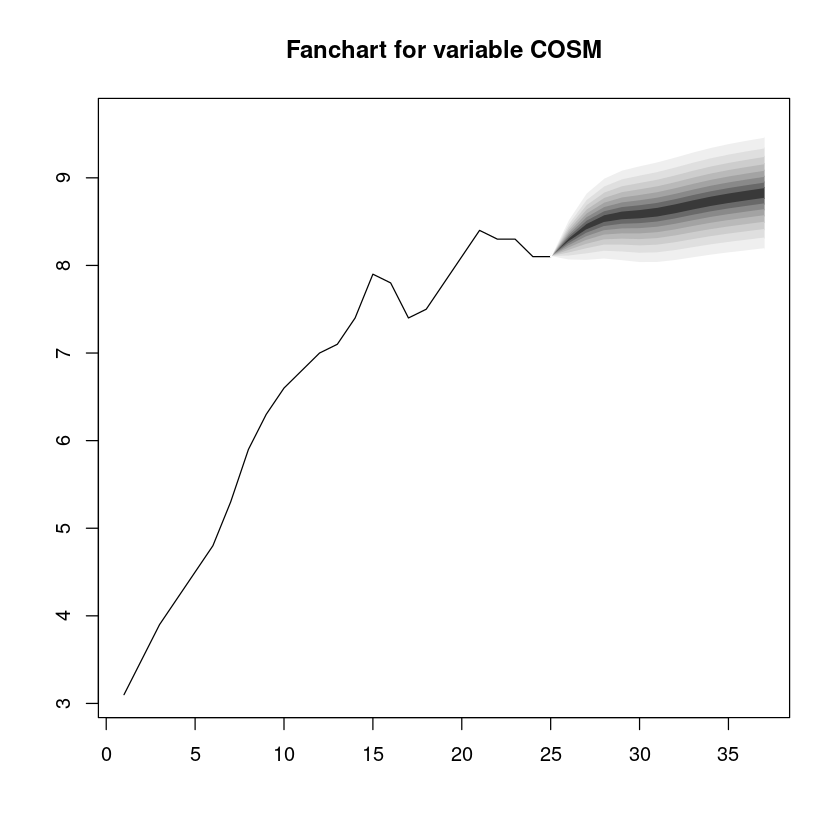

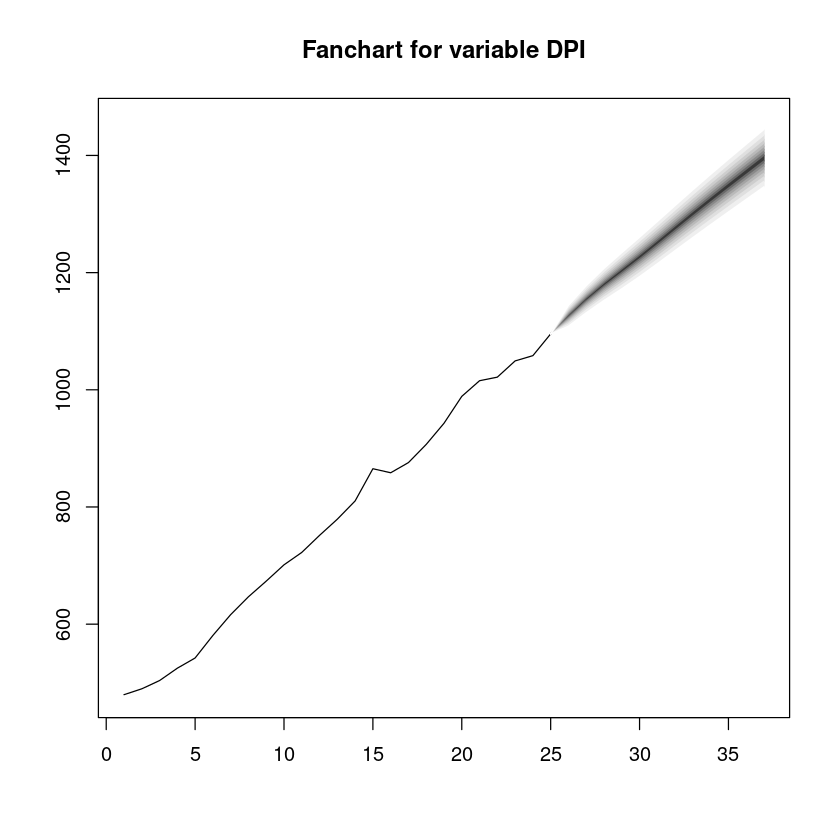

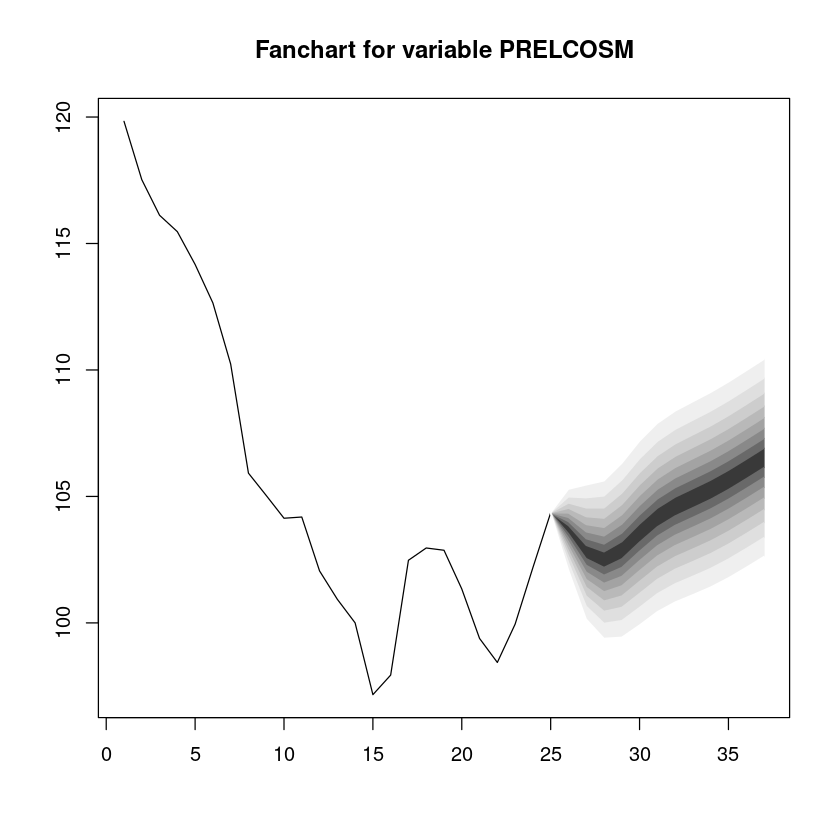

In [22]:
fanchart(forecast, names='COSM')
fanchart(forecast, names='DPI')
fanchart(forecast, names='PRELCOSM')

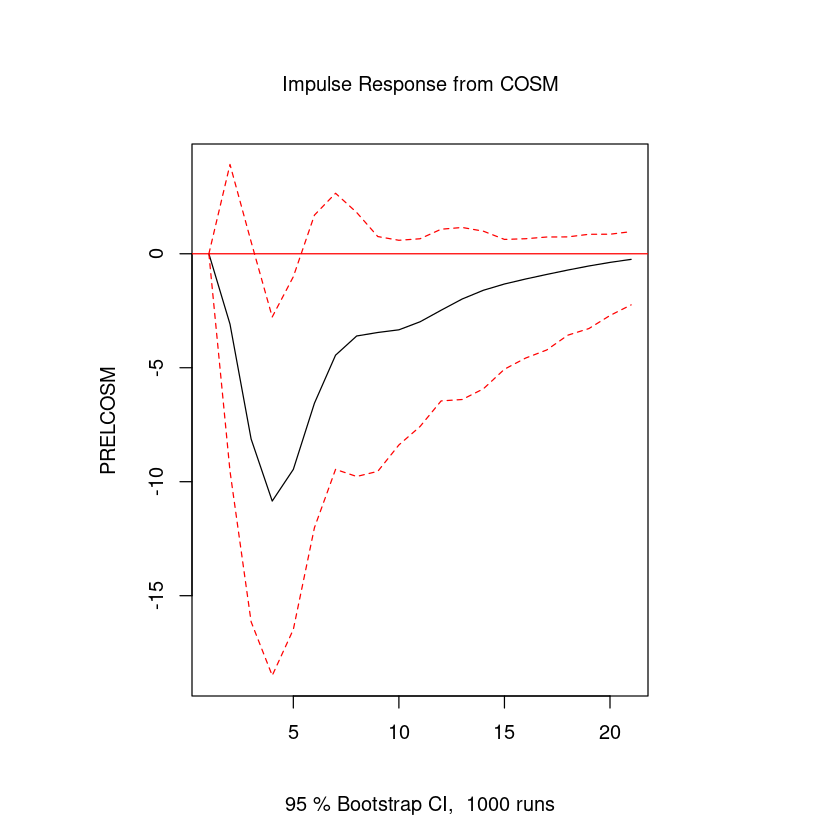

In [25]:
feir <- irf(Model1, impulse = "COSM", response = "PRELCOSM",
             n.ahead = 20, ortho = FALSE, runs = 1000)

plot(feir)

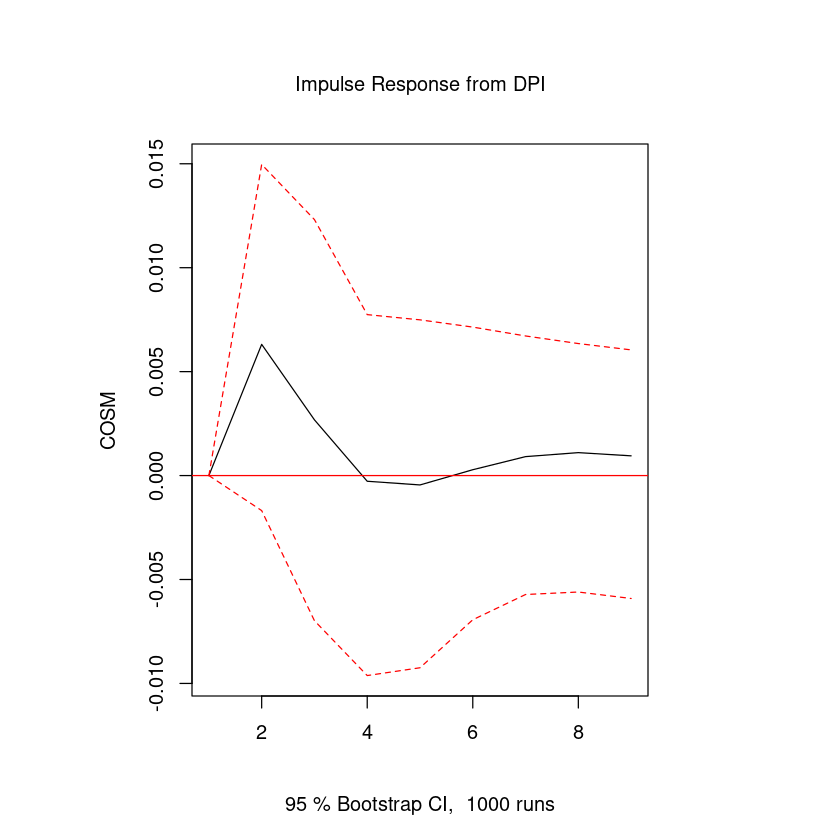

In [26]:
feir <- irf(Model1, impulse = "DPI", response = "COSM",
             n.ahead = 8, ortho = FALSE, runs = 1000)

plot(feir)